In [28]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
# suppress warn (SearchCV gives lots of warn)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("sample_data/titanic.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
# preprocess df
df["gender_code"] = df["Sex"].replace(["male", "female"], [0, 1])
df = pd.concat([df, pd.get_dummies(df["Embarked"])], axis=1)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  gender_code           C           Q           S  
count  891.000000  891.000000   891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208     0.352413    0.188552    0.086420    0.722783  
std      0.806057   49.693429     0.477990    0.391372    0.281141    0.447876  
min      0.000000    0.000000     0.000000    0.000000    0.000000    0.000000  
25%      0.000000    7.910400     0.000000    0.000000    0.000000    0.000000  
50%      0.000000   14.454200     0.000000    0.000000    0.000000    1.000000  
75%      0.000000   31.000000     1.000000    0.000000    0.000000    1.000000  
max      6.000000  512.329200     1.000000    1.000000    1.000000    1.000000

In [6]:
# split x, y, unused
x = df[["Pclass", "Age", "SibSp", "Parch", "Fare", "gender_code", "C", "Q", "S"]]
y = df["Survived"]
unused = df[["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=42)
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")

x_train.shape:(623, 9)
x_test.shape:(268, 9)
y_train.shape:(623,)
y_test.shape:(268,)


LogisticRegression Parameters
- penalty
    - Specify the norm of the penalty
    - 'none': no penalty is added
    - 'l1': add a L1 penalty term
    - 'l2': add a L2 penalty term (default)
    - 'elasticnet': both L1 and L2 penalty terms are added

- tol
    - Tolerance for stopping criteria
    - float, default=1e-4

- C
    - Inverse of regularization strength; must be a positive float
    - smaller values specify stronger regularization
    - float, default=1.0

In [7]:
# prepare param grid
param_grid = {
    "penalty": ["none", "l1", "l2", "elasticnet"],
    "tol": [0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "C": [0.01, 0.1, 1, 10, 100],
}

In [8]:
grid_cv = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=5,
    return_train_score=True
)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             return_train_score=True)

In [9]:
print(f"grid_cv.best_estimator_:{grid_cv.best_estimator_}")
print(f"grid_cv.best_score_:{grid_cv.best_score_}")
print(f"grid_cv detail result:\n{pd.DataFrame(grid_cv.cv_results_)}")

grid_cv.best_estimator_:LogisticRegression(C=0.1, tol=0.01)
grid_cv.best_score_:0.8121806451612903
grid_cv detail result:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.025126      0.008910         0.001608        0.000495    0.01   
1        0.018946      0.000641         0.001198        0.000398    0.01   
2        0.018158      0.001168         0.001397        0.000487    0.01   
3        0.018361      0.001013         0.001392        0.000484    0.01   
4        0.019147      0.001309         0.001204        0.000401    0.01   
..            ...           ...              ...             ...     ...   
95       0.000189      0.000379         0.000000        0.000000     100   
96       0.000200      0.000399         0.000000        0.000000     100   
97       0.000807      0.000404         0.000000        0.000000     100   
98       0.000200      0.000400         0.000000        0.000000     100   
99       0.000591      0.000483         0.

In [12]:
# prepare param distributions
param_distributions = {
    "penalty": ["none", "l1", "l2", "elasticnet"],
    "tol": randint(low=0.000001, high=1),    # [0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "C": randint(low=0.01, high=100),           # [0.01, 0.1, 1, 10, 100],
}

In [16]:
random_cv = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_distributions,
    n_iter=200,
    cv=5,
    return_train_score=True
)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A2C814BE0>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'tol': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A2C814F40>},
                   return_train_score=True)

In [17]:
print(f"random_cv.best_estimator_:{random_cv.best_estimator_}")
print(f"random_cv.best_score_:{random_cv.best_score_}")
print(f"random_cv detail result:\n{pd.DataFrame(random_cv.cv_results_)}")

random_cv.best_estimator_:LogisticRegression(C=3, tol=0)
random_cv.best_score_:0.7977290322580646
random_cv detail result:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000598      0.000488         0.000000        0.000000      84   
1         0.024939      0.004538         0.001591        0.000803      34   
2         0.000199      0.000397         0.000000        0.000000      56   
3         0.000598      0.000489         0.000000        0.000000       4   
4         0.019543      0.001204         0.001611        0.000507      23   
..             ...           ...              ...             ...     ...   
195       0.019962      0.000881         0.001194        0.000385      14   
196       0.021148      0.002550         0.001205        0.000406      36   
197       0.022537      0.001603         0.001402        0.000482      49   
198       0.019935      0.001775         0.001415        0.000497      82   
199       0.020345      0.0010

In [29]:
grid_cv = GridSearchCV(
    LogisticRegression(),
    param_grid={"C": np.arange(0.01, 1, 0.01),},
    cv=5,
    return_train_score=True
)
grid_cv.fit(x_train, y_train)
grid_cv_result = pd.DataFrame(grid_cv.cv_results_)

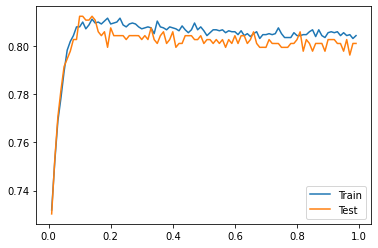

In [30]:
plt.plot(
    grid_cv_result["param_C"],
    grid_cv_result["mean_train_score"],
    label="Train"
)

plt.plot(
    grid_cv_result["param_C"],
    grid_cv_result["mean_test_score"],
    label="Test"
)

plt.legend()